Linkler : 

Solutions to these exercises are available at the end of this chapter’s notebook, at https://homl.info/colab3.


* https://www.kaggle.com/c/titanic
* https://spamassassin.apache.org/old/publiccorpus/
* https://homl.info/titanic.tgz
 


# Question 3

Tackle the Titanic dataset. A great place to start is on Kaggle. Alternatively, you
can download the data from https://homl.info/titanic.tgz and unzip this tarball
like you did for the housing data in Chapter 2. This will give you two CSV files,
train.csv and test.csv, which you can load using pandas.read_csv(). The goal
is to train a classifier that can predict the Survived column based on the other
columns.


## Download the data 

When load_titanic_data() is called, it looks for the datasets/titanic.tgz file. If it
does not find it, it creates the datasets directory inside the current directory (which
is /content by default, in Colab), downloads the titanic.tgz file from the ageron/data
GitHub repository, and extracts its content into the datasets directory; this creates the
datasets/titanic directory with the train.csv and test.csv file inside it. Lastly, the function loads
this CSV files into a Pandas DataFrame object containing all the data, and returns it.

In [ ]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_titanic_data():
    tarball_path = Path("datasets/titanic.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/titanic.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as titanic_tarball:
            titanic_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/titanic/train.csv")), pd.read_csv(Path("datasets/titanic/test.csv"))

titanic_train, titanic_test = load_titanic_data()

## Take a Quick Look at the Data Structure

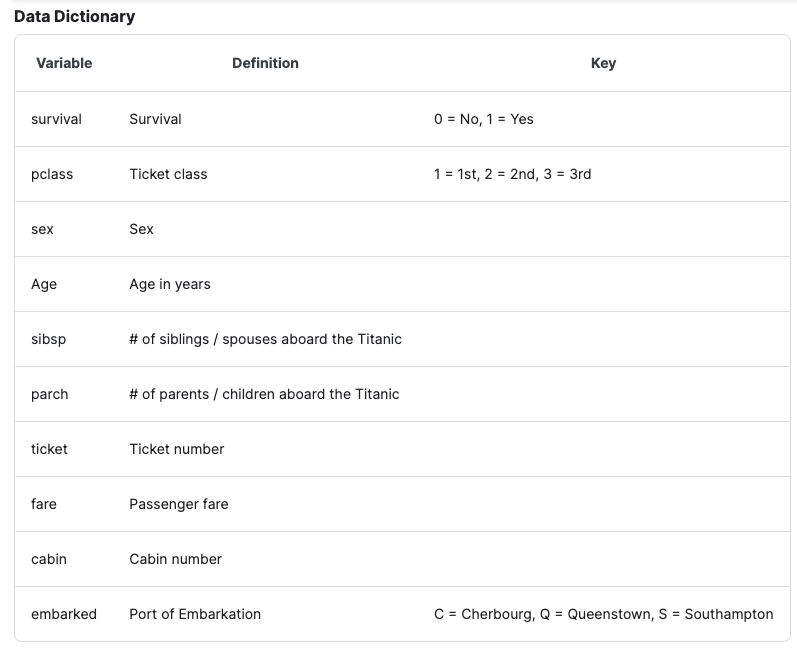

In [ ]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
titanic_train["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [ ]:
titanic_train["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
titanic_train["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
titanic_train["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [ ]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699113,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526507,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.416700,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Data Cleaning and Reshaping

In [ ]:
# fill_na
# Age, Cabin, Embarked

titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
titanic_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
mean_value = titanic_train["Age"].mean()
titanic_train["Age"].fillna(mean_value, inplace = True)
titanic_train["Cabin"].fillna("No Cabin", inplace = True)
titanic_train["Embarked"].fillna(titanic_train["Embarked"].value_counts().idxmax(), inplace = True)
titanic_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,No Cabin,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,No Cabin,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,No Cabin,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,No Cabin,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen 'Carrie'",female,29.699113,1,2,W./C. 6607,23.4500,No Cabin,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [ ]:
titanic_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [ ]:
# remove duplicates

#find duplicate rows across all columns
duplicateRows = titanic_train[titanic_train.duplicated()]
duplicateRows # No duplicates found

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [ ]:
duplicateRows_test = titanic_test[titanic_test.duplicated()]
duplicateRows_test # No duplicates found

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [ ]:
# use passanger id as index
titanic_train = titanic_train.set_index('PassengerId')
titanic_train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,No Cabin,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,No Cabin,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,No Cabin,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,No Cabin,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen 'Carrie'",female,29.699113,1,2,W./C. 6607,23.4500,No Cabin,S


In [ ]:
titanic_test = titanic_test.set_index('PassengerId')
titanic_test

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


In [ ]:
# create y - output matrix 
y_train = titanic_train["Survived"]
y_train

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 891, dtype: int64

In [ ]:
titanic_train = titanic_train.drop('Survived', axis = 1)
titanic_train

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,No Cabin,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
3,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,No Cabin,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
5,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,No Cabin,S
...,...,...,...,...,...,...,...,...,...,...
887,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,No Cabin,S
888,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
889,3,"Johnston, Miss. Catherine Helen 'Carrie'",female,29.699113,1,2,W./C. 6607,23.4500,No Cabin,S


In [ ]:
# create X - input matrix
# one row per instance, one column per feature
# define pipelines 

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# for numerical values
num_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="median")),  # na varsa median değerini koyuyor
        ("scaler", StandardScaler()) # z = (x - u) / s , u: mean,s : standard deviation
    ])


In [ ]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

# for categorical values
cat_pipeline = Pipeline([
        ("ordinal_encoder", OrdinalEncoder()),    # order : lise, üniversite, yüksek lisans gibi
        ("imputer", SimpleImputer(strategy="most_frequent")), # na varsa en çok geçen kelimeyi koyuyot
        ("cat_encoder", OneHotEncoder(sparse=False)), # no order : dog, cat, fish gibi
    ])

In [ ]:
# join numerical and categorical pipelines
from sklearn.compose import ColumnTransformer

num_attribs = ["Age", "SibSp", "Parch", "Fare"]
cat_attribs = ["Pclass", "Sex", "Embarked"]
# name, passengerid, cabin, ticket columns are not used

preprocess_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
    ])

In [ ]:
ohe = OneHotEncoder()
transformed = ohe.fit_transform(titanic_train[['Pclass']])
print(transformed.toarray())

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 ...
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [ ]:
ohe = OneHotEncoder()
transformed = ohe.fit_transform(titanic_train[['Sex']])
print(transformed.toarray())

[[0. 1.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [0. 1.]
 [0. 1.]]


In [ ]:
ohe = OneHotEncoder()
transformed = ohe.fit_transform(titanic_train[['Embarked']])
print(transformed.toarray())

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 ...
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]]


In [ ]:
X_train = preprocess_pipeline.fit_transform(titanic_train)
pd.DataFrame(X_train)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,0,1,2,3,4,5,6,7,8,9,10,11
0,-5.924799e-01,0.432793,-0.473674,-0.502445,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,6.387890e-01,0.432793,-0.473674,0.786845,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,-2.846627e-01,-0.474545,-0.473674,-0.488854,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,4.079261e-01,0.432793,-0.473674,0.420730,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,4.079261e-01,-0.474545,-0.473674,-0.486337,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,-2.077084e-01,-0.474545,-0.473674,-0.386671,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
887,-8.233428e-01,-0.474545,-0.473674,-0.044381,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
888,2.733966e-16,0.432793,2.008933,-0.176263,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
889,-2.846627e-01,-0.474545,-0.473674,-0.044381,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


## Trainig a Binary Classifier

### SGC - S Gradient Descent

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [ ]:
some_passenger = X_train[5]
sgd_clf.predict([some_passenger])

array([0])

In [ ]:
y_train_pred_sgd = sgd_clf.predict(X_train)

### Random Forest 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42) # The number of trees in the forest
forest_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_train_pred_forest = forest_clf.predict(X_train)

## Performance Measures

### S Gradient Descent

In [ ]:
from sklearn.model_selection import cross_val_score

sgd_scores = cross_val_score(sgd_clf, X_train, y_train, cv=10, scoring="accuracy")
sgd_scores

array([0.72222222, 0.75280899, 0.71910112, 0.86516854, 0.7752809 ,
       0.75280899, 0.75280899, 0.83146067, 0.82022472, 0.74157303])

In [ ]:
sgd_scores.mean()

0.7733458177278403

In [ ]:
from sklearn.metrics import confusion_matrix
cm_sgd = confusion_matrix(y_train, y_train_pred_sgd)
cm_sgd
# row - preticted
# column - actual
# negative predicted and actually netative, positive predicted and actually netative
# negative predicted and actually positive , positive predicted and actually positive

array([[488,  61],
       [142, 200]])

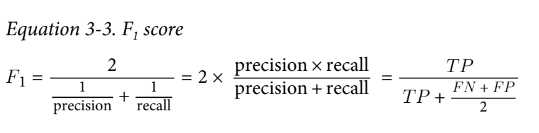

In [ ]:
from sklearn.metrics import f1_score
# precison = tp/tp+fp : survived tahmin edilenlerin kaçı gerçekten kurtulmuş
# recall  = tp/tp+fn : # gerçekte kurtulmuş olanları kaçı doğru tahmin edilmiş

# Whereas the regular mean treats all values equally, the harmonic mean gives much 
# more weight to low values. As a result, the classifier will only get a high F1
# score if both recall and precision are high.

f1_score(y_train, y_train_pred_sgd)

0.6633499170812603

### Random Forest

In [ ]:
forest_scores = cross_val_score(forest_clf, X_train, y_train, cv=10)
forest_scores

array([0.73333333, 0.78651685, 0.75280899, 0.84269663, 0.87640449,
       0.84269663, 0.82022472, 0.76404494, 0.84269663, 0.85393258])

In [ ]:
forest_scores.mean()

0.8115355805243445

In [ ]:
cm_forest = confusion_matrix(y_train, y_train_pred_forest)
cm_forest

array([[545,   4],
       [ 12, 330]])

In [ ]:
f1_score(y_train, y_train_pred_forest)

0.9763313609467456

## Comparison

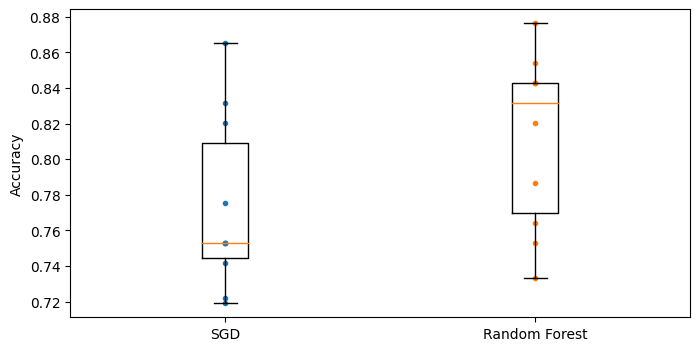

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 4))
plt.plot([1]*10, sgd_scores, ".")
plt.plot([2]*10, forest_scores, ".")
plt.boxplot([sgd_scores, forest_scores], labels=("SGD", "Random Forest"))
plt.ylabel("Accuracy")
plt.show() 

## Test Dataset

In [ ]:
# augmented_accuracy = knn_clf.score(X_test, y_test)
X_test = preprocess_pipeline.transform(titanic_test)
y_pred = sgd_clf.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

# Question 4

## a. Download examples of spam and ham from Apache SpamAssassin’s public datasets.

In [ ]:
import tarfile

def fetch_spam_data():
    spam_root = "http://spamassassin.apache.org/old/publiccorpus/"
    ham_url = spam_root + "20030228_easy_ham.tar.bz2"
    spam_url = spam_root + "20030228_spam.tar.bz2"

    spam_path = Path() / "datasets" / "spam"
    spam_path.mkdir(parents=True, exist_ok=True)
    for dir_name, tar_name, url in (("easy_ham", "ham", ham_url),
                                    ("spam", "spam", spam_url)):
        if not (spam_path / dir_name).is_dir():
            path = (spam_path / tar_name).with_suffix(".tar.bz2")
            print("Downloading", path)
            urllib.request.urlretrieve(url, path)
            tar_bz2_file = tarfile.open(path)
            tar_bz2_file.extractall(path=spam_path)
            tar_bz2_file.close()
    return [spam_path / dir_name for dir_name in ("easy_ham", "spam")]

In [ ]:
ham_dir, spam_dir = fetch_spam_data()

In [ ]:
ham_dir

PosixPath('datasets/spam/easy_ham')

In [ ]:
import os 
os.path.getsize(ham_dir)

184320

## b. Unzip the datasets and familiarize yourself with the data format.

In [ ]:
ham_filenames = [f for f in sorted(ham_dir.iterdir()) if len(f.name) > 20] # cmd file not included
ham_filenames

[PosixPath('datasets/spam/easy_ham/00001.7c53336b37003a9286aba55d2945844c'),
 PosixPath('datasets/spam/easy_ham/00002.9c4069e25e1ef370c078db7ee85ff9ac'),
 PosixPath('datasets/spam/easy_ham/00003.860e3c3cee1b42ead714c5c874fe25f7'),
 PosixPath('datasets/spam/easy_ham/00004.864220c5b6930b209cc287c361c99af1'),
 PosixPath('datasets/spam/easy_ham/00005.bf27cdeaf0b8c4647ecd61b1d09da613'),
 PosixPath('datasets/spam/easy_ham/00006.253ea2f9a9cc36fa0b1129b04b806608'),
 PosixPath('datasets/spam/easy_ham/00007.37a8af848caae585af4fe35779656d55'),
 PosixPath('datasets/spam/easy_ham/00008.5891548d921601906337dcf1ed8543cb'),
 PosixPath('datasets/spam/easy_ham/00009.371eca25b0169ce5cb4f71d3e07b9e2d'),
 PosixPath('datasets/spam/easy_ham/00010.145d22c053c1a0c410242e46c01635b3'),
 PosixPath('datasets/spam/easy_ham/00011.fbcde1b4833bdbaaf0ced723edd6e355'),
 PosixPath('datasets/spam/easy_ham/00012.48a387bc38d1316a6f6b49e8c2e43a03'),
 PosixPath('datasets/spam/easy_ham/00013.81c34741dbed59c6dde50777e27e7ea3'),

In [ ]:
len(ham_filenames)

2500

In [ ]:
spam_filenames = [f for f in sorted(spam_dir.iterdir()) if len(f.name) > 20]
spam_filenames

[PosixPath('datasets/spam/spam/00001.7848dde101aa985090474a91ec93fcf0'),
 PosixPath('datasets/spam/spam/00002.d94f1b97e48ed3b553b3508d116e6a09'),
 PosixPath('datasets/spam/spam/00003.2ee33bc6eacdb11f38d052c44819ba6c'),
 PosixPath('datasets/spam/spam/00004.eac8de8d759b7e74154f142194282724'),
 PosixPath('datasets/spam/spam/00005.57696a39d7d84318ce497886896bf90d'),
 PosixPath('datasets/spam/spam/00006.5ab5620d3d7c6c0db76234556a16f6c1'),
 PosixPath('datasets/spam/spam/00007.d8521faf753ff9ee989122f6816f87d7'),
 PosixPath('datasets/spam/spam/00008.dfd941deb10f5eed78b1594b131c9266'),
 PosixPath('datasets/spam/spam/00009.027bf6e0b0c4ab34db3ce0ea4bf2edab'),
 PosixPath('datasets/spam/spam/00010.445affef4c70feec58f9198cfbc22997'),
 PosixPath('datasets/spam/spam/00011.61816b9ad167657773a427d890d0468e'),
 PosixPath('datasets/spam/spam/00012.381e4f512915109ba1e0853a7a8407b2'),
 PosixPath('datasets/spam/spam/00013.d3f0b591a65f116ea5d9d4ad919f83aa'),
 PosixPath('datasets/spam/spam/00014.7d38c46424f24f

In [ ]:
len(spam_filenames)

500

In [ ]:
# rb - read and binary mode
# When a file is opened in binary mode, its contents are read as 
# raw bytes, rather than as text. This is useful when working with 
# files that contain non-text data, such as images, audio files, 
# or compressed files.

# policy : Using default lets us parse the email 
# using the \n line breaks.

import email
import email.policy

def load_email(filepath):
    with open(filepath, "rb") as f:
        return email.parser.BytesParser(policy=email.policy.default).parse(f)

In [ ]:
ham_emails = [load_email(filepath) for filepath in ham_filenames]
spam_emails = [load_email(filepath) for filepath in spam_filenames]

In [ ]:
ham_emails

 ...]

In [ ]:
print(ham_emails[1].get_content())

Martin A posted:
Tassos Papadopoulos, the Greek sculptor behind the plan, judged that the
 limestone of Mount Kerdylio, 70 miles east of Salonika and not far from the
 Mount Athos monastic community, was ideal for the patriotic sculpture. 
 
 As well as Alexander's granite features, 240 ft high and 170 ft wide, a
 museum, a restored amphitheatre and car park for admiring crowds are
planned
---------------------
So is this mountain limestone or granite?
If it's limestone, it'll weather pretty fast.

------------------------ Yahoo! Groups Sponsor ---------------------~-->
4 DVDs Free +s&p Join Now
http://us.click.yahoo.com/pt6YBB/NXiEAA/mG3HAA/7gSolB/TM
---------------------------------------------------------------------~->

To unsubscribe from this group, send an email to:
forteana-unsubscribe@egroups.com

 

Your use of Yahoo! Groups is subject to http://docs.yahoo.com/info/terms/ 






In [ ]:
# The strip() method removes any leading (spaces at the beginning) 
# and trailing (spaces at the end) characters (space is the default 
# leading character to remove)
print(ham_emails[1].get_content().strip())

Martin A posted:
Tassos Papadopoulos, the Greek sculptor behind the plan, judged that the
 limestone of Mount Kerdylio, 70 miles east of Salonika and not far from the
 Mount Athos monastic community, was ideal for the patriotic sculpture. 
 
 As well as Alexander's granite features, 240 ft high and 170 ft wide, a
 museum, a restored amphitheatre and car park for admiring crowds are
planned
---------------------
So is this mountain limestone or granite?
If it's limestone, it'll weather pretty fast.

------------------------ Yahoo! Groups Sponsor ---------------------~-->
4 DVDs Free +s&p Join Now
http://us.click.yahoo.com/pt6YBB/NXiEAA/mG3HAA/7gSolB/TM
---------------------------------------------------------------------~->

To unsubscribe from this group, send an email to:
forteana-unsubscribe@egroups.com

 

Your use of Yahoo! Groups is subject to http://docs.yahoo.com/info/terms/


In [ ]:
ham_emails[1].items()

[('Return-Path', '<Steve_Burt@cursor-system.com>'),
 ('Delivered-To', 'zzzz@localhost.netnoteinc.com'),
 ('Received',
  'from localhost (localhost [127.0.0.1])\tby phobos.labs.netnoteinc.com (Postfix) with ESMTP id BE12E43C34\tfor <zzzz@localhost>; Thu, 22 Aug 2002 07:46:38 -0400 (EDT)'),
 ('Received',
  'from phobos [127.0.0.1]\tby localhost with IMAP (fetchmail-5.9.0)\tfor zzzz@localhost (single-drop); Thu, 22 Aug 2002 12:46:38 +0100 (IST)'),
 ('Received',
  'from n20.grp.scd.yahoo.com (n20.grp.scd.yahoo.com    [66.218.66.76]) by dogma.slashnull.org (8.11.6/8.11.6) with SMTP id    g7MBkTZ05087 for <zzzz@spamassassin.taint.org>; Thu, 22 Aug 2002 12:46:29 +0100'),
 ('X-Egroups-Return',
  'sentto-2242572-52726-1030016790-zzzz=spamassassin.taint.org@returns.groups.yahoo.com'),
 ('Received',
  'from [66.218.67.196] by n20.grp.scd.yahoo.com with NNFMP;    22 Aug 2002 11:46:30 -0000'),
 ('X-Sender', 'steve.burt@cursor-system.com'),
 ('X-Apparently-To', 'zzzzteana@yahoogroups.com'),
 ('Recei

In [ ]:
# Headers in emails are parts such as the subject, date, etc
for header, value in spam_emails[10].items():
    print(header, ":", value)

Return-Path : <hurst@missouri.co.jp>
Delivered-To : zzzz@localhost.spamassassin.taint.org
Received : from localhost (localhost [127.0.0.1])	by phobos.labs.spamassassin.taint.org (Postfix) with ESMTP id 2667B44156	for <zzzz@localhost>; Fri, 23 Aug 2002 06:02:51 -0400 (EDT)
Received : from mail.webnote.net [193.120.211.219]	by localhost with POP3 (fetchmail-5.9.0)	for zzzz@localhost (single-drop); Fri, 23 Aug 2002 11:02:51 +0100 (IST)
Received : from toole.uol.com.br (toole.uol.com.br [200.231.206.186])	by webnote.net (8.9.3/8.9.3) with ESMTP id WAA06855;	Thu, 22 Aug 2002 22:28:56 +0100
From : hurst@missouri.co.jp
Received : from activatormail.com ([200.158.104.164])	by toole.uol.com.br (8.9.1/8.9.1) with SMTP id SAA13079;	Thu, 22 Aug 2002 18:21:49 -0300 (BRT)
Message-ID : <000023b8700d$00003a16$00004696@missouri.co.jp>
To : hurst@missouri.co.jp
Subject : ^^^^^Cell Phone Belt Clips $1.95^^^^^^                           18070
Date : Thu, 22 Aug 2002 15:45:31 -0600
MIME-Version : 1.0
Conte

In [ ]:
spam_emails[10]["Subject"]

'^^^^^Cell Phone Belt Clips $1.95^^^^^^                           18070'

In [ ]:
print(spam_emails[6].get_content().strip())

Help wanted.  We are a 14 year old fortune 500 company, that is
growing at a tremendous rate.  We are looking for individuals who
want to work from home.

This is an opportunity to make an excellent income.  No experience
is required.  We will train you.

So if you are looking to be employed from home with a career that has
vast opportunities, then go:

http://www.basetel.com/wealthnow

We are looking for energetic and self motivated people.  If that is you
than click on the link and fill out the form, and one of our
employement specialist will contact you.

To be removed from our link simple go to:

http://www.basetel.com/remove.html


4139vOLW7-758DoDY1425FRhM1-764SMFc8513fCsLl40


In [ ]:
"""
An email message consists of headers and a payload 
(which is also referred to as the content). 
Headers are RFC 5322 or RFC 6532 style field names and values, 
where the field name and value are separated by a colon. 
The colon is not part of either the field name or the field value. 
The payload may be a simple text message, or a binary object, 
or a structured sequence of sub-messages each with their own set of 
headers and their own payload. The latter type of payload is 
indicated by the message having a MIME type such as multipart/* 
or message/rfc822.
"""

'\nAn email message consists of headers and a payload \n(which is also referred to as the content). \nHeaders are RFC 5322 or RFC 6532 style field names and values, \nwhere the field name and value are separated by a colon. \nThe colon is not part of either the field name or the field value. \nThe payload may be a simple text message, or a binary object, \nor a structured sequence of sub-messages each with their own set of \nheaders and their own payload. The latter type of payload is \nindicated by the message having a MIME type such as multipart/* \nor message/rfc822.\n'

In [ ]:
'''Getting the most common email structures'''
def get_structures(email):
  #if its plain text return text/plain
    if isinstance(email, str):
        return email
    email_payload = email.get_payload()
    #if the payload is a list then its probably a multipart
    #return a multipart there after
    if isinstance(email_payload, list):
        return "multipart({})".format(", ".join([
            get_structures(sub_email)
            for sub_email in email_payload
        ]))
    else:
        return email.get_content_type()


In [ ]:
get_structures(ham_emails[1034])

'text/plain'

In [ ]:
from collections import Counter
#function for counting the types
def type_counter(emails):
    our_count = Counter()
    for email in emails:
        structure = get_structures(email)
        our_count[structure] += 1
    return our_count

In [ ]:
type_counter(ham_emails).most_common()

[('text/plain', 2408),
 ('multipart(text/plain, application/pgp-signature)', 66),
 ('multipart(text/plain, text/html)', 8),
 ('multipart(text/plain, text/plain)', 4),
 ('multipart(text/plain)', 3),
 ('multipart(text/plain, application/octet-stream)', 2),
 ('multipart(text/plain, text/enriched)', 1),
 ('multipart(text/plain, application/ms-tnef, text/plain)', 1),
 ('multipart(multipart(text/plain, text/plain, text/plain), application/pgp-signature)',
  1),
 ('multipart(text/plain, video/mng)', 1),
 ('multipart(text/plain, multipart(text/plain))', 1),
 ('multipart(text/plain, application/x-pkcs7-signature)', 1),
 ('multipart(text/plain, multipart(text/plain, text/plain), text/rfc822-headers)',
  1),
 ('multipart(text/plain, multipart(text/plain, text/plain), multipart(multipart(text/plain, application/x-pkcs7-signature)))',
  1),
 ('multipart(text/plain, application/x-java-applet)', 1)]

In [ ]:
type_counter(spam_emails).most_common()

[('text/plain', 218),
 ('text/html', 183),
 ('multipart(text/plain, text/html)', 45),
 ('multipart(text/html)', 20),
 ('multipart(text/plain)', 19),
 ('multipart(multipart(text/html))', 5),
 ('multipart(text/plain, image/jpeg)', 3),
 ('multipart(text/html, application/octet-stream)', 2),
 ('multipart(text/plain, application/octet-stream)', 1),
 ('multipart(text/html, text/plain)', 1),
 ('multipart(multipart(text/html), application/octet-stream, image/jpeg)', 1),
 ('multipart(multipart(text/plain, text/html), image/gif)', 1),
 ('multipart/alternative', 1)]

## c. Split the data into a training set and a test set.

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

X = np.array(ham_emails + spam_emails, dtype=object)
X

array([<email.message.EmailMessage object at 0x7f98a3d0e5b0>,
       <email.message.EmailMessage object at 0x7f98a3d0ea60>, ...,
      dtype=object)

In [ ]:
y = np.array([0] * len(ham_emails) + [1] * len(spam_emails)) 
# target values
# when ham --> 0 
# when spam --> 1
y

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

In [ ]:
pd.DataFrame(X_train) # headers

,0
0,"[Return-Path, Delivered-To, Received, Received..."
1,"[Return-Path, Delivered-To, Received, Received..."
2,"[Return-Path, Delivered-To, Received, Received..."
3,"[Return-Path, Delivery-Date, From, Date, Subje..."
4,"[Return-Path, Delivered-To, Received, Received..."
...,...
2395,"[Return-Path, Delivery-Date, From, Date, Subje..."
2396,"[Return-Path, Delivered-To, Received, Received..."
2397,"[Return-Path, Delivered-To, Received, Received..."
2398,"[Return-Path, Delivered-To, Received, Received..."


In [ ]:
pd.DataFrame(X_train).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       2400 non-null   object
dtypes: object(1)
memory usage: 18.9+ KB


## d. Write a data preparation pipeline to convert each email into a feature vector.

Your preparation pipeline should transform an email into a (sparse) vector
that indicates the presence or absence of each possible word. For example, if
all emails only ever contain four words, “Hello”, “how”, “are”, “you”, then the email “Hello you Hello Hello you” would be converted into a vector [1, 0,
0, 1] (meaning [“Hello” is present, “how” is absent, “are” is absent, “you” is
present]), or [3, 0, 0, 2] if you prefer to count the number of occurrences of
each word.

You may want to add hyperparameters to your preparation pipeline to control
whether or not to strip off email headers, convert each email to lowercase,
remove punctuation, replace all URLs with “URL”, replace all numbers with
“NUMBER”, or even perform stemming (i.e., trim off word endings; there are
Python libraries available to do this).


In [ ]:
from bs4 import BeautifulSoup
import re

def html_to_plain_text_b(html):
  
  text = BeautifulSoup(html.get_content())
  return text.get_text().strip()

html_spam_emails = [email for email in X_train[y_train==1]
                    if get_structures(email) == "text/html"]

sample_html_spam = html_spam_emails[7]
print(sample_html_spam.get_content().strip()[:1000], "...")

<HTML><HEAD><TITLE></TITLE><META http-equiv="Content-Type" content="text/html; charset=windows-1252"><STYLE>A:link {TEX-DECORATION: none}A:active {TEXT-DECORATION: none}A:visited {TEXT-DECORATION: none}A:hover {COLOR: #0033ff; TEXT-DECORATION: underline}</STYLE><META content="MSHTML 6.00.2713.1100" name="GENERATOR"></HEAD>
<BODY text="#000000" vLink="#0033ff" link="#0033ff" bgColor="#CCCC99"><TABLE borderColor="#660000" cellSpacing="0" cellPadding="0" border="0" width="100%"><TR><TD bgColor="#CCCC99" valign="top" colspan="2" height="27">
<font size="6" face="Arial, Helvetica, sans-serif" color="#660000">
<b>OTC</b></font></TD></TR><TR><TD height="2" bgcolor="#6a694f">
<font size="5" face="Times New Roman, Times, serif" color="#FFFFFF">
<b>&nbsp;Newsletter</b></font></TD><TD height="2" bgcolor="#6a694f"><div align="right"><font color="#FFFFFF">
<b>Discover Tomorrow's Winners&nbsp;</b></font></div></TD></TR><TR><TD height="25" colspan="2" bgcolor="#CCCC99"><table width="100%" border="0" 

In [ ]:
print(html_to_plain_text_b(sample_html_spam))

OTC

 Newsletter
Discover Tomorrow's Winners 

For Immediate Release

Cal-Bay (Stock Symbol: CBYI)
Watch for analyst "Strong Buy Recommendations" and several advisory newsletters picking CBYI.  CBYI has filed to be traded on the OTCBB, share prices historically INCREASE when companies get listed on this larger trading exchange. CBYI is trading around 25 cents and should skyrocket to $2.66 - $3.25 a share in the near future.
Put CBYI on your watch list, acquire a position TODAY.

REASONS TO INVEST IN CBYI

A profitable company and is on track to beat ALL earnings estimates!

One of the FASTEST growing distributors in environmental & safety equipment instruments.

Excellent management team, several EXCLUSIVE contracts.  IMPRESSIVE client list including the U.S. Air Force, Anheuser-Busch, Chevron Refining and Mitsubishi Heavy Industries, GE-Energy & Environmental Research.

RAPIDLY GROWING INDUSTRY
Industry revenues exceed $900 million, estimates indicate that there could be as much as $2

In [ ]:
print(BeautifulSoup(sample_html_spam.get_content()).get_text().strip()[:1000], "...")

OTC

 Newsletter
Discover Tomorrow's Winners 

For Immediate Release

Cal-Bay (Stock Symbol: CBYI)
Watch for analyst "Strong Buy Recommendations" and several advisory newsletters picking CBYI.  CBYI has filed to be traded on the OTCBB, share prices historically INCREASE when companies get listed on this larger trading exchange. CBYI is trading around 25 cents and should skyrocket to $2.66 - $3.25 a share in the near future.
Put CBYI on your watch list, acquire a position TODAY.

REASONS TO INVEST IN CBYI

A profitable company and is on track to beat ALL earnings estimates!

One of the FASTEST growing distributors in environmental & safety equipment instruments.

Excellent management team, several EXCLUSIVE contracts.  IMPRESSIVE client list including the U.S. Air Force, Anheuser-Busch, Chevron Refining and Mitsubishi Heavy Industries, GE-Energy & Environmental Research.

RAPIDLY GROWING INDUSTRY
Industry revenues exceed $900 million, estimates indicate that there could be as much as $2

In [ ]:
import re
from html import unescape

def html_to_plain_text(html):
    text = re.sub('<head.*?>.*?</head>', '', html, flags=re.M | re.S | re.I)
    text = re.sub('<a\s.*?>', ' HYPERLINK ', text, flags=re.M | re.S | re.I)
    text = re.sub('<.*?>', '', text, flags=re.M | re.S)
    text = re.sub(r'(\s*\n)+', '\n', text, flags=re.M | re.S)
    return unescape(text)

In [ ]:
def email_to_text(email):
    html = None
    for part in email.walk():
        ctype = part.get_content_type()
        if not ctype in ("text/plain", "text/html"):
            continue
        try:
            content = part.get_content()
        except: # in case of encoding issues
            content = str(part.get_payload())
        if ctype == "text/plain":
            return content
        else:
            html = content
    if html:
        return html_to_plain_text(html)

In [ ]:
print(email_to_text(sample_html_spam)[:100], "...")


OTC
 Newsletter
Discover Tomorrow's Winners 
For Immediate Release
Cal-Bay (Stock Symbol: CBYI)
Wat ...


In [ ]:
import nltk

stemmer = nltk.PorterStemmer()
for word in ("Computations", "Computation", "Computing", "Computed", "Compute",
             "Compulsive"):
    print(word, "=>", stemmer.stem(word))

Computations => comput
Computation => comput
Computing => comput
Computed => comput
Compute => comput
Compulsive => compuls


In [ ]:
# Is this notebook running on Colab or Kaggle?
import sys
IS_COLAB = "google.colab" in sys.modules
IS_KAGGLE = "kaggle_secrets" in sys.modules

# if running this notebook on Colab or Kaggle, we just pip install urlextract
if IS_COLAB or IS_KAGGLE:
    %pip install -q -U urlextract

In [ ]:
import urlextract # may require an Internet connection to download root domain
                  # names

url_extractor = urlextract.URLExtract()
some_text = "Will it detect github.com and https://youtu.be/7Pq-S557XQU?t=3m32s"
print(url_extractor.find_urls(some_text))

['github.com', 'https://youtu.be/7Pq-S557XQU?t=3m32s']


In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class EmailToWordCounterTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, strip_headers=True, lower_case=True,
                 remove_punctuation=True, replace_urls=True,
                 replace_numbers=True, stemming=True):
        self.strip_headers = strip_headers
        self.lower_case = lower_case
        self.remove_punctuation = remove_punctuation
        self.replace_urls = replace_urls
        self.replace_numbers = replace_numbers
        self.stemming = stemming
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        X_transformed = []
        for email in X:
            text = email_to_text(email) or ""
            if self.lower_case:
                text = text.lower()
            if self.replace_urls and url_extractor is not None:
                urls = list(set(url_extractor.find_urls(text)))
                urls.sort(key=lambda url: len(url), reverse=True)
                for url in urls:
                    text = text.replace(url, " URL ")
            if self.replace_numbers:
                text = re.sub(r'\d+(?:\.\d*)?(?:[eE][+-]?\d+)?', 'NUMBER', text)
            if self.remove_punctuation:
                text = re.sub(r'\W+', ' ', text, flags=re.M)
            word_counts = Counter(text.split())
            if self.stemming and stemmer is not None:
                stemmed_word_counts = Counter()
                for word, count in word_counts.items():
                    stemmed_word = stemmer.stem(word)
                    stemmed_word_counts[stemmed_word] += count
                word_counts = stemmed_word_counts
            X_transformed.append(word_counts)
        return np.array(X_transformed)

In [ ]:
X_few = X_train[:3]
X_few_wordcounts = EmailToWordCounterTransformer().fit_transform(X_few)
X_few_wordcounts

array([Counter({'chuck': 1, 'murcko': 1, 'wrote': 1, 'stuff': 1, 'yawn': 1, 'r': 1}),
       Counter({'the': 11, 'of': 9, 'and': 8, 'all': 3, 'christian': 3, 'to': 3, 'by': 3, 'jefferson': 2, 'i': 2, 'have': 2, 'superstit': 2, 'one': 2, 'on': 2, 'been': 2, 'ha': 2, 'half': 2, 'rogueri': 2, 'teach': 2, 'jesu': 2, 'some': 1, 'interest': 1, 'quot': 1, 'url': 1, 'thoma': 1, 'examin': 1, 'known': 1, 'word': 1, 'do': 1, 'not': 1, 'find': 1, 'in': 1, 'our': 1, 'particular': 1, 'redeem': 1, 'featur': 1, 'they': 1, 'are': 1, 'alik': 1, 'found': 1, 'fabl': 1, 'mytholog': 1, 'million': 1, 'innoc': 1, 'men': 1, 'women': 1, 'children': 1, 'sinc': 1, 'introduct': 1, 'burnt': 1, 'tortur': 1, 'fine': 1, 'imprison': 1, 'what': 1, 'effect': 1, 'thi': 1, 'coercion': 1, 'make': 1, 'world': 1, 'fool': 1, 'other': 1, 'hypocrit': 1, 'support': 1, 'error': 1, 'over': 1, 'earth': 1, 'six': 1, 'histor': 1, 'american': 1, 'john': 1, 'e': 1, 'remsburg': 1, 'letter': 1, 'william': 1, 'short': 1, 'again': 1, 'becom

In [ ]:
"""

Now we have the word counts, and we need to 
convert them to vectors. For this, we will build 
another transformer whose fit() method will build the 
vocabulary (an ordered list of the most common words) 
and whose transform() method will use the vocabulary to 
convert word counts to vectors. The output is a sparse 
matrix.

"""
from scipy.sparse import csr_matrix

class WordCounterToVectorTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, vocabulary_size=1000):
        self.vocabulary_size = vocabulary_size
    def fit(self, X, y=None):
        total_count = Counter()
        for word_count in X:
            for word, count in word_count.items():
                total_count[word] += min(count, 10)
        most_common = total_count.most_common()[:self.vocabulary_size]
        self.vocabulary_ = {word: index + 1
                            for index, (word, count) in enumerate(most_common)}
        return self
    def transform(self, X, y=None):
        rows = []
        cols = []
        data = []
        for row, word_count in enumerate(X):
            for word, count in word_count.items():
                rows.append(row)
                cols.append(self.vocabulary_.get(word, 0))
                data.append(count)
        return csr_matrix((data, (rows, cols)),
                          shape=(len(X), self.vocabulary_size + 1))

In [ ]:
vocab_transformer = WordCounterToVectorTransformer(vocabulary_size=10)
X_few_vectors = vocab_transformer.fit_transform(X_few_wordcounts)
X_few_vectors

<3x11 sparse matrix of type '<class 'numpy.int64'>'
	with 20 stored elements in Compressed Sparse Row format>

In [ ]:
X_few_vectors.toarray()
"""

the 99 in the second row, first column, means that the 
second email contains 99 words that are not part of 
the vocabulary. The 11 next to it means that the first 
word in the vocabulary is present 11 times in this 
email. The 9 next to it means that the second word is 
present 9 times, and so on. You can look at the 
vocabulary to know which words we are talking about. 
The first word is "the", the second word is "of", etc.

"""

array([[ 6,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [99, 11,  9,  8,  3,  1,  3,  1,  3,  2,  3],
       [67,  0,  1,  2,  3,  4,  1,  2,  0,  1,  0]])

In [ ]:
vocab_transformer.vocabulary_

{'the': 1,
 'of': 2,
 'and': 3,
 'to': 4,
 'url': 5,
 'all': 6,
 'in': 7,
 'christian': 8,
 'on': 9,
 'by': 10}

## e. Finally, try out several classifiers and see if you can build a great spam classifier, with both high recall and high precision.

In [ ]:
from sklearn.pipeline import Pipeline

preprocess_pipeline = Pipeline([
    ("email_to_wordcount", EmailToWordCounterTransformer()),
    ("wordcount_to_vector", WordCounterToVectorTransformer()),
])

X_train_transformed = preprocess_pipeline.fit_transform(X_train)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

log_clf = LogisticRegression(max_iter=1000, random_state=42)
score = cross_val_score(log_clf, X_train_transformed, y_train, cv=3)
score.mean()

0.985

In [ ]:
from sklearn.metrics import precision_score, recall_score

X_test_transformed = preprocess_pipeline.transform(X_test)

log_clf = LogisticRegression(max_iter=1000, random_state=42)
log_clf.fit(X_train_transformed, y_train)

y_pred = log_clf.predict(X_test_transformed)

print(f"Precision: {precision_score(y_test, y_pred):.2%}")
print(f"Recall: {recall_score(y_test, y_pred):.2%}")

Precision: 96.88%
Recall: 97.89%
